<a href="https://colab.research.google.com/github/NikhilGurrapu/PCA_on_MNIST_dataset/blob/main/PCA_on_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px

# Reading dataset

In [47]:
data=pd.read_csv('/content/sample_data/mnist_train_small.csv')
d=pd.read_csv('/content/sample_data/mnist_test.csv')

# d append to data records increased

In [48]:
a=0
for i in data.columns:
  data.rename(columns={i:a},inplace=True)
  a+=1
data.rename(columns={0:'label'},inplace=True)
a=0
for i in d.columns:
  d.rename(columns={i:a},inplace=True)
  a+=1
d.rename(columns={0:'label'},inplace=True)
data=data.append(d,ignore_index=True)

In [49]:
data.shape

(29998, 785)

In [50]:
data.head()

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


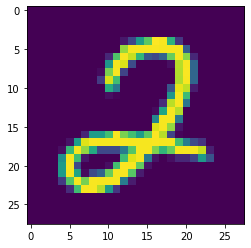

In [51]:
plt.imshow(data.iloc[4,1:].values.reshape(28,28))

# splitting data into train and test set

In [52]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [54]:
X_train.shape

(23998, 784)

# training KNN

In [55]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred)*100

96.31666666666666

# scaling set for PCA

In [57]:
scaler=StandardScaler()

In [58]:
X_train=scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

# dimensionality Reduction with PCA

In [59]:
pca=PCA(n_components=101)
X_train_tnf=pca.fit_transform(X_train)
X_test_tnf= pca.transform(X_test)

knn=KNeighborsClassifier()
knn.fit(X_train_tnf,y_train)
y_pred2=knn.predict(X_test_tnf)

accuracy_score(y_test,y_pred2)*100

94.6

In [60]:
#2-D PCA
pca=PCA(n_components=2)
X_train_tnf = pca.fit_transform(X_train)
X_test_tnf = pca.transform(X_test)

knn=KNeighborsClassifier()
knn.fit(X_train_tnf,y_train)
y_pred2=knn.predict(X_test_tnf)

accuracy_score(y_test,y_pred2)*100

33.050000000000004

In [61]:
y_train_tnf = y_train.astype(str)
fig = px.scatter(x=X_train_tnf[:,0],
                 y=X_train_tnf[:,1],
                 color=y_train_tnf,
                 color_discrete_sequence = px.colors.qualitative.G10
                 )
fig.show()

In [62]:
#3-D PCA
pca=PCA(n_components=3)
X_train_tnf = pca.fit_transform(X_train)
X_test_tnf = pca.transform(X_test)

knn=KNeighborsClassifier()
knn.fit(X_train_tnf,y_train)
y_pred2=knn.predict(X_test_tnf)

accuracy_score(y_test,y_pred2)*100

50.8

In [63]:
X_train_tnf.shape

(23998, 3)

In [64]:
y_train_tnf = y_train.astype(str)
fig = px.scatter_3d(data, x=X_train_tnf[:,0], y=X_train_tnf[:,1], z=X_train_tnf[:,2],
                    color=y_train_tnf)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))

fig.show()

In [65]:
#Eigen values
pca.explained_variance_

array([40.83785891, 29.08731378, 27.03400436])

In [66]:
#Eigen Vectors
print(pca.components_)
print("\n 3 vectors with 784 dimensions: ",pca.components_.shape)

[[-3.65663267e-18  1.70749250e-20  3.20321358e-20 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.58545849e-17 -1.47533385e-18  6.46188571e-20 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.95580707e-16  4.95797902e-18 -1.93546007e-19 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]

 3 vectors with 784 dimensions:  (3, 784)


In [67]:
pca=PCA(n_components=None)
X_train_tnf = pca.fit_transform(X_train)
X_test_tnf = pca.transform(X_test)

In [68]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05935488, 0.10163119, 0.14092317, 0.1714354 , 0.19780027,
       0.22090301, 0.24114699, 0.25923133, 0.27538367, 0.28993949,
       0.30412496, 0.31695872, 0.32883251, 0.34036941, 0.35106578,
       0.36151354, 0.37124602, 0.38089688, 0.39014685, 0.3990926 ,
       0.40766381, 0.4160122 , 0.42405301, 0.43194593, 0.43965333,
       0.44703308, 0.45417894, 0.46118331, 0.46791504, 0.47435222,
       0.48069407, 0.4869683 , 0.49305928, 0.4989778 , 0.50485235,
       0.51049196, 0.51607391, 0.52148918, 0.52688731, 0.53216483,
       0.53733594, 0.54234271, 0.54726614, 0.55212115, 0.55689033,
       0.56155905, 0.5661938 , 0.57079913, 0.57531112, 0.57976846,
       0.58411861, 0.58839965, 0.59266135, 0.59683601, 0.60093266,
       0.6049578 , 0.60893732, 0.61274308, 0.61651499, 0.62026301,
       0.62394492, 0.62756521, 0.63112891, 0.634665  , 0.63811987,
       0.64156242, 0.64496475, 0.64834036, 0.65166405, 0.65491483,
       0.65815735, 0.66139175, 0.66455789, 0.66766516, 0.67073

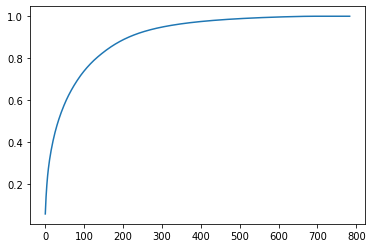

In [69]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))